# Titanic Disaster

In this reboot, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [1]:
# Importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

❓ Load the CSV data as a into a `titanic_df` variable.

the csv file is available at this url: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [2]:
# Load the Titanic dataset from the provided URL
titanic_df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv")

# Display the first few rows of the dataset to verify
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [14]:
#method shape
print("Shape of the dataset:", titanic_df.shape, "\n")

#method dtype
print("Data Types:", titanic_df.dtypes, "\n")

#method describe()
print("Descriptive Statistics:\n", titanic_df.describe(),  "\n")

#method info()
print("Info:\n", titanic_df.info(), "\n")

#isnull.sum()
print("Missing Values:\n", titanic_df.isnull().sum(), "\n")


Shape of the dataset: (891, 12) 

Data Types: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Descriptive Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

      

It seems that the `Cabin` information is missing in 687 rows. Pretty normal considering people in 3rd class (`Pclass`) did not have one!

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [15]:
titanic_df.drop(columns='Cabin', inplace=True)

## Classes Analysis

Let's have a look at the ticket divide.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [16]:
pclass_df = titanic_df.groupby('Pclass').size().reset_index(name='Number_of_Tickets')
print(pclass_df)

   Pclass  Number_of_Tickets
0       1                216
1       2                184
2       3                491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

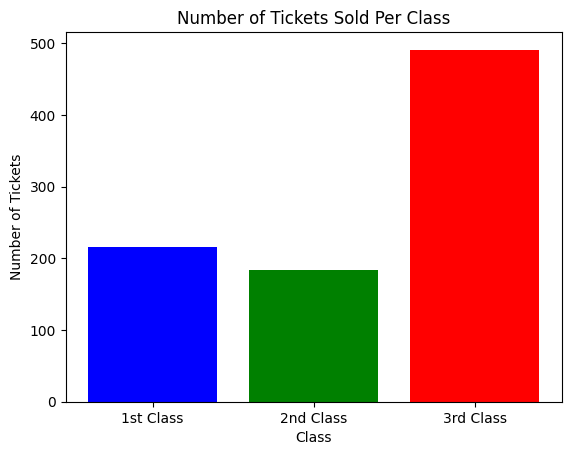

In [17]:
# Plotting the bar chart
plt.bar(pclass_df['Pclass'], pclass_df['Number_of_Tickets'], color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Number of Tickets Sold Per Class')
plt.xlabel('Class')
plt.ylabel('Number of Tickets')
plt.xticks([1, 2, 3], ['1st Class', '2nd Class', '3rd Class'])  # Setting custom x-tick labels
plt.show()

Let's now have a look at **survivors**.

❓ Plot a barchart of *frequency of survivals* per class. `0` means no one survived in the class, `1` means everyone survived.

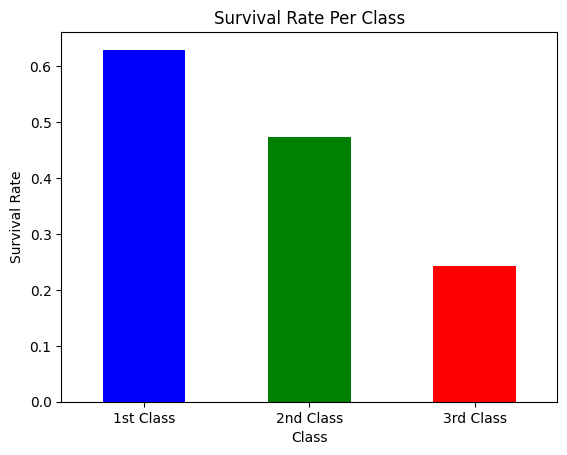

In [18]:
# Grouping by class and calculating the mean of the 'Survived' column
survival_rate = titanic_df.groupby('Pclass')['Survived'].mean()

# Plotting the bar chart
survival_rate.plot(kind='bar', color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Survival Rate Per Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'], rotation=0)  # Setting custom x-tick labels
plt.show()

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [19]:
unique_sex_values = titanic_df['Sex'].unique()
print(unique_sex_values)

['male' 'female']


❓ Plot a barchart of survival frequency of each gender. Who survived the most?

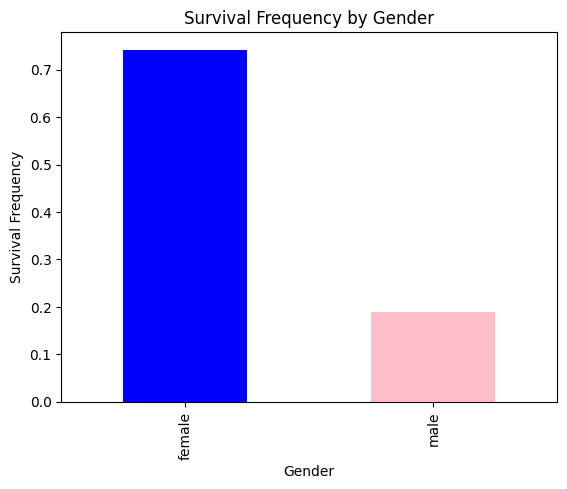

In [20]:
# Grouping by 'Sex' and calculating the mean of 'Survived' column
gender_survival = titanic_df.groupby('Sex')['Survived'].mean()

# Plotting the barchart
gender_survival.plot(kind='bar', color=['blue', 'pink'])
plt.title('Survival Frequency by Gender')
plt.ylabel('Survival Frequency')
plt.xlabel('Gender')
plt.show()

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors (for each gender).

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

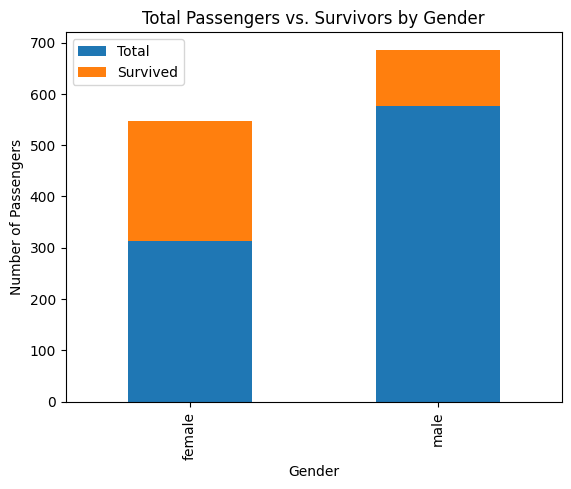

In [21]:
# Total passengers by gender
total_passengers = titanic_df.groupby('Sex').size()

# Total survivors by gender
survivors = titanic_df.groupby('Sex')['Survived'].sum()

# Creating the DataFrame
survivors_df = pd.DataFrame({
    'Total': total_passengers,
    'Survived': survivors
})

# Plotting the DataFrame
survivors_df.plot(kind='bar', stacked=True)
plt.title('Total Passengers vs. Survivors by Gender')
plt.ylabel('Number of Passengers')
plt.xlabel('Gender')
plt.show()

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how survival rates are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [29]:
# Filtering the dataframe for passengers under 18 years of age
children_df = titanic_df[titanic_df['Age'] < 18]
print(children_df)

     PassengerId  Survived  Pclass                                     Name  \
7              8         0       3           Palsson, Master. Gosta Leonard   
9             10         1       2      Nasser, Mrs. Nicholas (Adele Achem)   
10            11         1       3          Sandstrom, Miss. Marguerite Rut   
14            15         0       3     Vestrom, Miss. Hulda Amanda Adolfina   
16            17         0       3                     Rice, Master. Eugene   
..           ...       ...     ...                                      ...   
850          851         0       3  Andersson, Master. Sigvard Harald Elias   
852          853         0       3                  Boulos, Miss. Nourelain   
853          854         1       1                Lines, Miss. Mary Conover   
869          870         1       3          Johnson, Master. Harold Theodor   
875          876         1       3         Najib, Miss. Adele Kiamie "Jane"   

        Sex   Age  SibSp  Parch    Ticket     Fare 

❓ How many children were there in the Titanic?

In [28]:
number_of_children = children_df.shape[0]
print(number_of_children)

113


❓ How many children survived?

In [27]:
children_survived = children_df[children_df['Survived'] == 1].shape[0]
print(children_survived)

61


❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

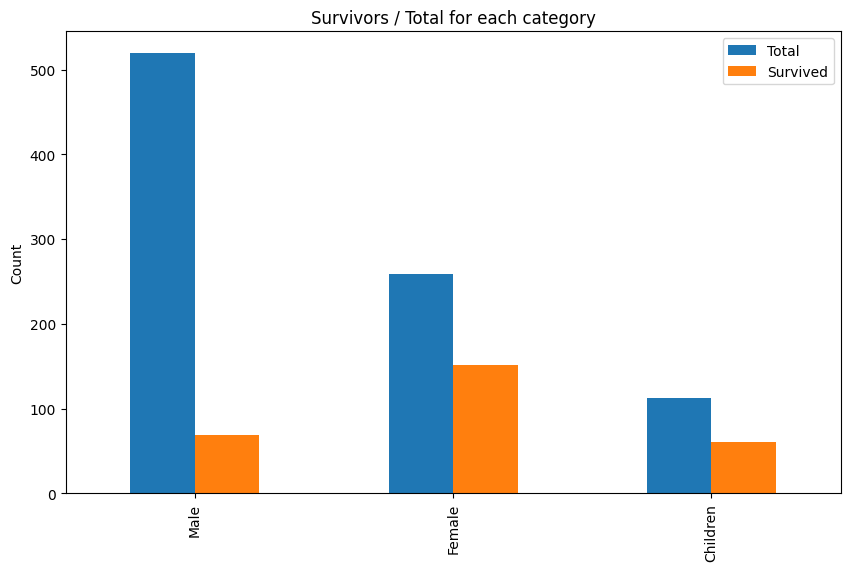

In [30]:
# Determine the number of boys and girls in children_df
boys = children_df[children_df['Sex'] == 'male'].shape[0]
girls = children_df.shape[0] - boys

# Calculate adult males and females
adult_males = titanic_df[titanic_df['Sex'] == 'male'].shape[0] - boys
adult_females = titanic_df[titanic_df['Sex'] == 'female'].shape[0] - girls

# Determine the number of adult males and females who survived
adult_males_survived = titanic_df[(titanic_df['Sex'] == 'male') & (titanic_df['Age'] > 18) & (titanic_df['Survived'] == 1)].shape[0]
adult_females_survived = titanic_df[(titanic_df['Sex'] == 'female') & (titanic_df['Age'] > 18) & (titanic_df['Survived'] == 1)].shape[0]
children_survived = children_df[children_df['Survived'] == 1].shape[0]

# Combine into a new DataFrame
data = {
    'Total': [adult_males, adult_females, children_df.shape[0]],
    'Survived': [adult_males_survived, adult_females_survived, children_survived]
}

categories = ['Male', 'Female', 'Children']
survivors_df = pd.DataFrame(data, index=categories)
survivors_df.plot(kind='bar', figsize=(10,6), title="Survivors / Total for each category")
plt.ylabel('Count')
plt.show()

## Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

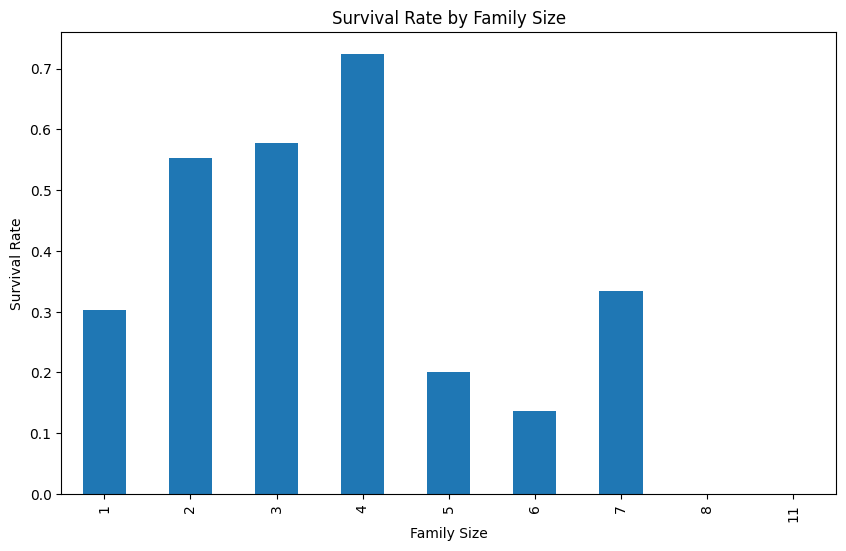

In [31]:
# Create a new column 'FamilySize'
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

# Group by 'FamilySize' and calculate survival rate
family_survival_rate = titanic_df.groupby('FamilySize')['Survived'].mean()

family_survival_rate.plot(kind='bar', figsize=(10,6), title="Survival Rate by Family Size")
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.show()

## Distinguished titles

❓ Were passengers with distinguished titles preferred during the evacuation?
   
With some string manipulation, create a new column for each user with their title

In [36]:
# Extract titles using regex
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check the value counts for the titles
print(titanic_df['Title'].value_counts())

# Group by 'Title' and calculate survival rate
title_survival_rate = titanic_df.groupby('Title')['Survived'].mean()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64


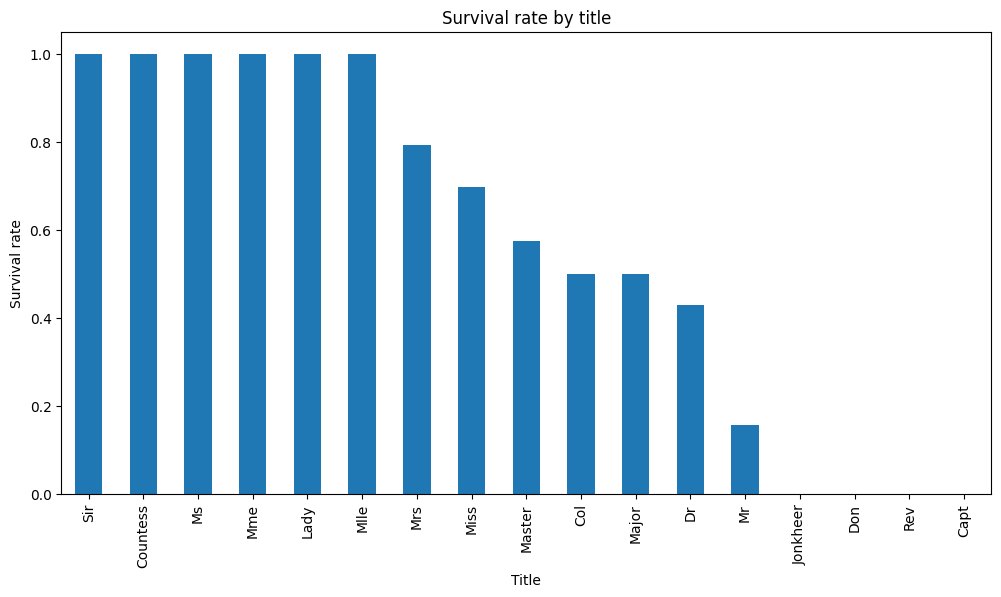

In [38]:
# Triez les taux de survie
title_survival_rate_sorted = title_survival_rate.sort_values(ascending=False)

# Affichez le graphique
import matplotlib.pyplot as plt

title_survival_rate_sorted.plot(kind='bar', figsize=(12,6))
plt.title('Survival rate by title')
plt.ylabel('Survival rate')
plt.xlabel('Title')
plt.show()